In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [ ]:
# Step 3: Preprocessing - Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

In [ ]:
# Voting Classifier (with Logistic Regression and SVC)
log_clf = LogisticRegression()
svc_clf = SVC(probability=True)

vote = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('svc', svc_clf),
    ('rf', rf)
], voting='soft')

vote.fit(X_train, y_train)
vote_pred = vote.predict(X_test)

In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("Voting Classifier Accuracy:", accuracy_score(y_test, vote_pred))

Random Forest Accuracy: 0.9649122807017544
Gradient Boosting Accuracy: 0.956140350877193
Voting Classifier Accuracy: 0.9736842105263158



Classification Report for Voting Classifier:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



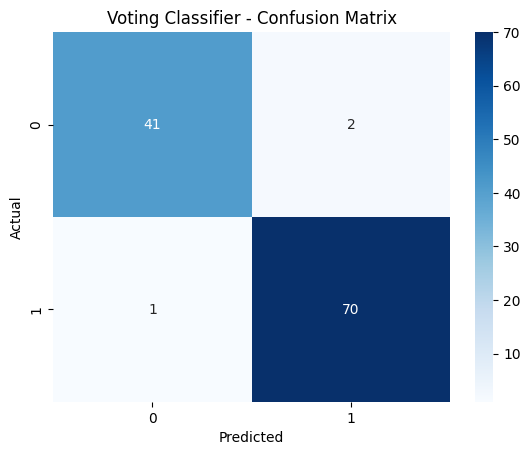

In [ ]:
# Optional: Classification report and confusion matrix
print("\nClassification Report for Voting Classifier:\n", classification_report(y_test, vote_pred))

sns.heatmap(confusion_matrix(y_test, vote_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Voting Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()